In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\acer\Downloads\House_Rent_Dataset.csv")

In [3]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [7]:
import seaborn as sns

<Axes: ylabel='Rent'>

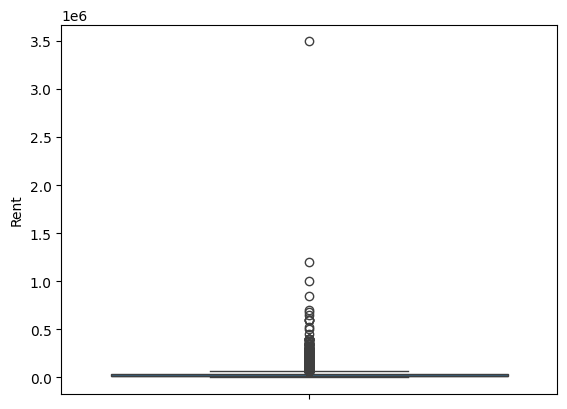

In [53]:
sns.boxplot(y)

In [11]:
df.info()
df.describe()


df =df.drop(['Posted On'] , axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Posted On  4746 non-null   object
 1   BHK        4746 non-null   int64 
 2   Rent       4746 non-null   int64 
 3   Size       4746 non-null   int64 
 4   Bathroom   4746 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 185.5+ KB


<Axes: >

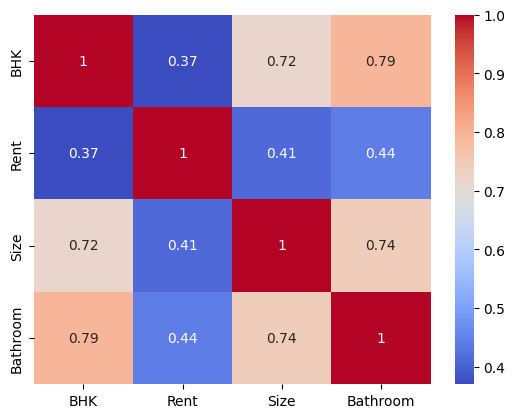

In [12]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [13]:
df

,BHK,Rent,Size,Bathroom
0,2,10000,1100,2
1,2,20000,800,1
2,2,17000,1000,1
3,2,10000,800,1
4,2,7500,850,1
...,...,...,...,...
4741,2,15000,1000,2
4742,3,29000,2000,3
4743,3,35000,1750,3
4744,3,45000,1500,2


In [14]:
X= df.drop(['Rent'], axis = 1)

In [15]:
y= df['Rent']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test , y_train, y_test = train_test_split(X ,y , test_size= 0.2 , random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc = StandardScaler()

In [43]:
X_train_sc = sc.fit_transform(X_train)

In [44]:
X_test_sc = sc.fit(X_test)

In [19]:
lr = LinearRegression()

In [45]:
lr.fit(X_train_sc,y_train)

LinearRegression()

In [24]:
from sklearn.metrics import classification_report

In [49]:
y_pred = lr.predict(X_test_sc)


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 2554775777.045534
R²: 0.35896327760736757


In [54]:
import matplotlib.pyplot as plt

In [55]:
diff = y_test-y_pred

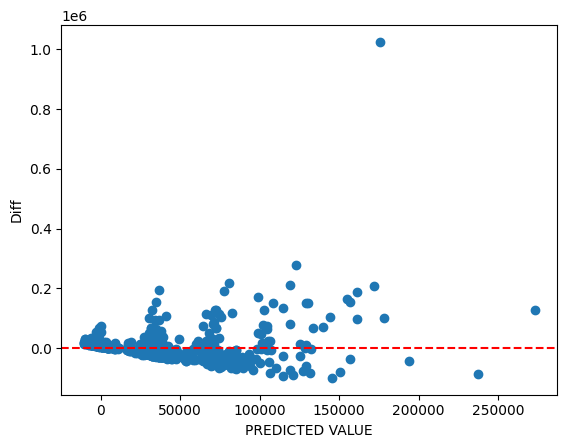

In [56]:
plt.scatter(y_pred , diff)
plt.axhline(0, color = 'red' , linestyle='--')
plt.xlabel('PREDICTED VALUE')
plt.ylabel('Diff')
plt.show()

In [57]:
coefficients = lr.coef_
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")


BHK: -225.71361211419733
Size: 13370.539126943273
Bathroom: 24485.06007468473


In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train_sc, y_train, cv=5, scoring='r2')
print("CV R² scores:", scores)
print("Mean CV R²:", scores.mean())


CV R² scores: [0.35895089 0.09923349 0.32097289 0.28317601 0.27694102]
Mean CV R²: 0.26785485892026084
